In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix, roc_curve, auc


In [3]:
# Read csv files
df= pd.read_csv("first_feature_df_17_12_2025.csv")
df.head(10)


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GCS_max,GCS_mean,Lactate_min,Lactate_max,Lactate_mean,BUN_min,BUN_mean,...,DIASBP_MEAN,AGE,RR_MEAN,RR_STD,RR_MAX,TEMP_STD,TEMP_MIN,HR_MEAN,HR_MAX,age_adj_comorbidity_score
0,3,145834,211552,6.0,4.444444,1.3,8.8,3.800000,36.0,40.500000,...,58.643678,76,17.137255,3.464215,29.0,0.335085,36.200001,98.925373,168.0,16.0
1,6,107064,228232,6.0,6.000000,NaN,NaN,NaN,65.0,65.500000,...,60.010417,65,12.937500,3.392145,22.0,0.441010,36.000002,84.791667,100.0,12.0
2,9,150750,220597,5.0,2.600000,1.9,2.7,2.380000,17.0,18.500000,...,76.731959,41,14.276316,0.917950,19.0,0.822093,35.500001,87.644737,111.0,12.0
3,12,112213,232669,6.0,4.842105,1.6,15.1,8.716667,28.0,35.500000,...,72.409302,72,15.944444,1.963676,23.0,0.837151,35.500001,83.208333,105.0,7.0
4,17,194023,277042,6.0,5.615385,0.9,0.9,0.900000,10.0,10.666667,...,52.360656,47,22.196429,5.753796,35.0,0.623295,36.000002,82.400000,114.0,0.0
5,21,109451,217847,6.0,6.000000,1.5,2.3,2.060000,50.0,77.666667,...,51.566434,87,16.222222,3.719742,26.0,0.459382,35.388887,71.690909,125.0,21.0
6,21,111970,216859,6.0,5.923077,1.6,2.7,2.150000,50.0,56.500000,...,39.214912,87,18.065574,3.749973,27.0,0.654310,35.944443,77.580645,100.0,20.0
7,25,129635,203487,6.0,6.000000,1.0,1.8,1.400000,34.0,46.333333,...,51.133333,58,18.172414,4.083076,36.0,0.528102,35.722224,76.898305,104.0,1.0
8,26,197661,244882,6.0,6.000000,NaN,NaN,NaN,28.0,29.500000,...,42.744681,72,20.106383,3.023344,26.0,0.453136,36.499998,70.404255,86.0,15.0
9,31,128652,254478,4.0,2.920000,1.4,1.5,1.450000,11.0,12.000000,...,54.560209,72,12.076923,0.269953,13.0,0.757767,35.000000,50.948718,57.0,18.0


In [4]:
# Find dataset size and column data types
print(df.shape)
pd.DataFrame({"column": df.columns, "dtype": df.dtypes.values})



(21178, 34)


,column,dtype
0,SUBJECT_ID,int64
1,HADM_ID,int64
2,ICUSTAY_ID,int64
3,GCS_max,float64
4,GCS_mean,float64
5,Lactate_min,float64
6,Lactate_max,float64
7,Lactate_mean,float64
8,BUN_min,float64
9,BUN_mean,float64


In [5]:
# Checking missing values
df.isnull().sum()

SUBJECT_ID                       0
HADM_ID                          0
ICUSTAY_ID                       0
GCS_max                        309
GCS_mean                       309
Lactate_min                   9328
Lactate_max                   9328
Lactate_mean                  9328
BUN_min                        171
BUN_mean                       171
AG_max                         282
AG_mean                        282
Bilirubin_max                11900
Bilirubin_mean               11900
MORTALITY_INHOSPITAL             0
AG_MEAN                        194
AG_MAX                         194
AG_MEDIAN                      194
AG_MIN                         194
AG_STD                         495
SYSBP_MIN                      250
SYSBP_MEAN                     250
SYSBP_STD                      252
DIASBP_MIN                     250
DIASBP_MEAN                    250
AGE                              0
RR_MEAN                        317
RR_STD                         323
RR_MAX              

In [6]:
# Checking missing value of Target varaible
df['MORTALITY_INHOSPITAL'].isnull().sum()

np.int64(0)

In [7]:
# Print the all columns names
print(df.columns.tolist())

['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'GCS_max', 'GCS_mean', 'Lactate_min', 'Lactate_max', 'Lactate_mean', 'BUN_min', 'BUN_mean', 'AG_max', 'AG_mean', 'Bilirubin_max', 'Bilirubin_mean', 'MORTALITY_INHOSPITAL', 'AG_MEAN', 'AG_MAX', 'AG_MEDIAN', 'AG_MIN', 'AG_STD', 'SYSBP_MIN', 'SYSBP_MEAN', 'SYSBP_STD', 'DIASBP_MIN', 'DIASBP_MEAN', 'AGE', 'RR_MEAN', 'RR_STD', 'RR_MAX', 'TEMP_STD', 'TEMP_MIN', 'HR_MEAN', 'HR_MAX', 'age_adj_comorbidity_score']


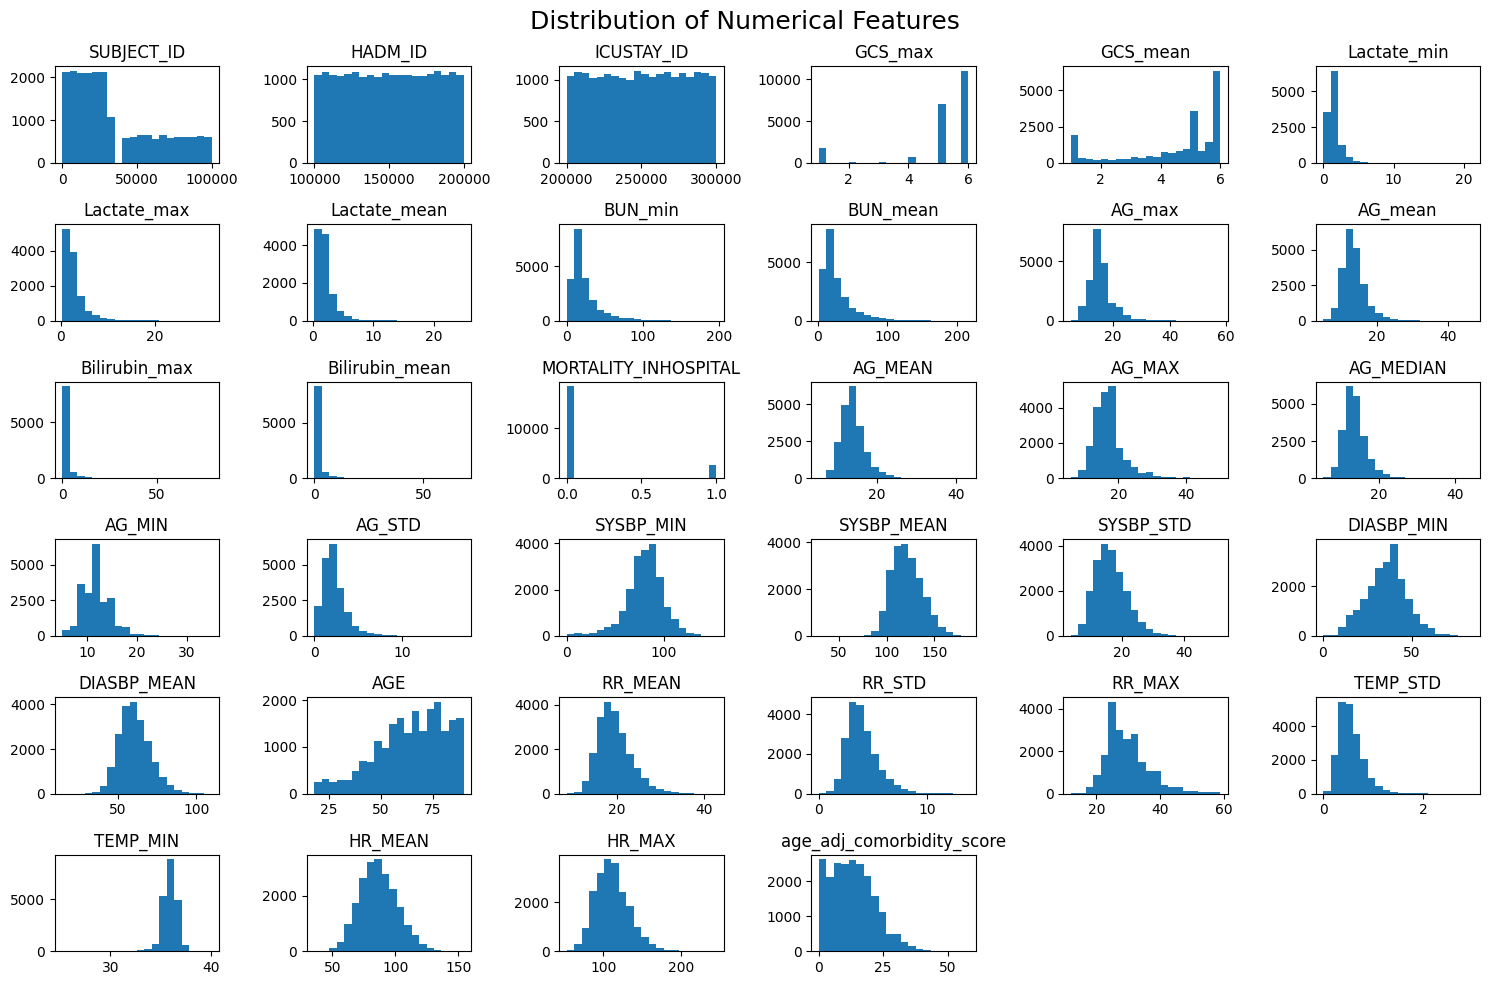

In [8]:
# Univariate Analysis 
df.hist(bins=20, figsize=(15, 10), grid=False)
plt.suptitle("Distribution of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()

In [9]:
# Calculate correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                           SUBJECT_ID   HADM_ID  ICUSTAY_ID   GCS_max  \
SUBJECT_ID                   1.000000  0.017328    0.001473 -0.481498   
HADM_ID                      0.017328  1.000000   -0.002751 -0.005379   
ICUSTAY_ID                   0.001473 -0.002751    1.000000 -0.012372   
GCS_max                     -0.481498 -0.005379   -0.012372  1.000000   
GCS_mean                    -0.484551 -0.006291   -0.012566  0.837490   
Lactate_min                 -0.094316 -0.017985    0.004463  0.019481   
Lactate_max                 -0.056030 -0.004538    0.024412 -0.095327   
Lactate_mean                -0.075609 -0.009534    0.018717 -0.055528   
BUN_min                     -0.037293 -0.011020    0.005317 -0.015298   
BUN_mean                    -0.035032 -0.010307    0.004691 -0.022176   
AG_max                      -0.040374 -0.012405    0.011590 -0.060758   
AG_mean                     -0.068840 -0.014146    0.011130 -0.019658   
Bilirubin_max               -0.004472 -0.007118   -

In [10]:
# Split data
X = df.drop(['MORTALITY_INHOSPITAL','SUBJECT_ID','HADM_ID','ICUSTAY_ID'], axis=1)
y = df['MORTALITY_INHOSPITAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")


# Filled the missing values with x_train median to avoid data leakage
medians = X_train.median()
X_train = X_train.fillna(medians)
X_test  = X_test.fillna(medians)




Train size: 16942
Test size: 4236


In [11]:
# Train the different model

model_lr= LogisticRegression(class_weight="balanced", max_iter=2000)
model_lr.fit(X_train, y_train)

model_dtc=DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, class_weight="balanced", random_state=42)
model_dtc.fit(X_train, y_train)

model_rfc= RandomForestClassifier(n_estimators=400,random_state=42,n_jobs=-1,class_weight="balanced_subsample")
model_rfc.fit(X_train, y_train)


def calculation(model, X_test, y_test, threshold=0.5):
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    auroc = roc_auc_score(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    cf_matrix = confusion_matrix(y_test, y_pred)
    cl_report = classification_report(y_test, y_pred, digits=4)
    return auroc, ap, cf_matrix, cl_report

# Calculate metrics for all models
print("Linear Regression:")
auroc, ap, cf_matrix, cl_report = calculation(model_lr, X_test, y_test)
print(f"Area Under the Receiver Operating Characteristic curve:{auroc}, Average Precision:{ap}")
print('Confusion Matrix:')
print(cf_matrix)
print('Classification Report:')
print(cl_report)

print("DecisionTreeClassifier:")
auroc, ap, cf_matrix, cl_report = calculation(model_lr, X_test, y_test)
print(f"Area Under the Receiver Operating Characteristic curve:{auroc}, Average Precision:{ap}")
print('Confusion Matrix:')
print(cf_matrix)
print('Classification Report:')
print(cl_report)

print("Random Forest:")
auroc, ap, cf_matrix, cl_report = calculation(model_rfc, X_test, y_test)
print(f"Area Under the Receiver Operating Characteristic curve:{auroc}, Average Precision:{ap}")
print('Confusion Matrix:')
print(cf_matrix)
print('Classification Report:')
print(cl_report)




Linear Regression:
Area Under the Receiver Operating Characteristic curve:0.8592319834262319, Average Precision:0.5663348295633928
Confusion Matrix:
[[3013  673]
 [ 123  427]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9608    0.8174    0.8833      3686
           1     0.3882    0.7764    0.5176       550

    accuracy                         0.8121      4236
   macro avg     0.6745    0.7969    0.7004      4236
weighted avg     0.8864    0.8121    0.8358      4236

DecisionTreeClassifier:
Area Under the Receiver Operating Characteristic curve:0.8592319834262319, Average Precision:0.5663348295633928
Confusion Matrix:
[[3013  673]
 [ 123  427]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9608    0.8174    0.8833      3686
           1     0.3882    0.7764    0.5176       550

    accuracy                         0.8121      4236
   macro avg     0.6745    0.7969    0.7004      423

In [12]:
# XGBoost model

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model_xgb=xgb.XGBClassifier(
        n_estimators=600,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        scale_pos_weight=scale_pos_weight,
        eval_metric="auc",
        random_state=42,
        n_jobs=-1)

model_xgb.fit(X_train, y_train)

print("XGBoost Classifier:")
auroc, ap, cf_matrix, cl_report = calculation(model_xgb, X_test, y_test)
print(f"Area Under the Receiver Operating Characteristic curve:{auroc}, Average Precision:{ap}")
print('Confusion Matrix:')
print(cf_matrix)
print('Classification Report:')
print(cl_report)



XGBoost Classifier:
Area Under the Receiver Operating Characteristic curve:0.8843866226014898, Average Precision:0.6467239630888019
Confusion Matrix:
[[3408  278]
 [ 204  346]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9435    0.9246    0.9340      3686
           1     0.5545    0.6291    0.5894       550

    accuracy                         0.8862      4236
   macro avg     0.7490    0.7768    0.7617      4236
weighted avg     0.8930    0.8862    0.8892      4236



In [13]:
# With KFold cross validation

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {"auroc": "roc_auc", "ap": "average_precision"}

def run_cv(name, model):
    res = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

    auroc_mean = res['test_auroc'].mean()
    auroc_std  = res['test_auroc'].std()
    ap_mean    = res['test_ap'].mean()
    ap_std     = res['test_ap'].std()

    print(f"{name} (5-Fold CV)")
    print(f"AUROC: {auroc_mean:.4f} ± {auroc_std:.4f}")
    print(f"AP: {ap_mean:.4f} ± {ap_std:.4f}\n")

    return {"model": name,"auroc_mean": auroc_mean, "auroc_std": auroc_std,"ap_mean": ap_mean, "ap_std": ap_std}

# Logistic Regression 
lr_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("model", model_lr)])

# Decision Tree
dtc_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("model", model_dtc)])

# Random Forest
rfc_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("model", model_rfc)])

# XGBoost model
xgb_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")), ("model", model_xgb)])

# Collecting results
results = []

results.append(run_cv("Logistic Regression", lr_pipe))
results.append(run_cv("Decision Tree", dtc_pipe))
results.append(run_cv("Random Forest", rfc_pipe))
results.append(run_cv("XGBoost", xgb_pipe))
print(results)

Logistic Regression (5-Fold CV)
AUROC: 0.8629 ± 0.0113
AP: 0.5492 ± 0.0313

Decision Tree (5-Fold CV)
AUROC: 0.8252 ± 0.0045
AP: 0.4762 ± 0.0151

Random Forest (5-Fold CV)
AUROC: 0.8793 ± 0.0074
AP: 0.5930 ± 0.0221

XGBoost (5-Fold CV)
AUROC: 0.8804 ± 0.0072
AP: 0.6299 ± 0.0214

[{'model': 'Logistic Regression', 'auroc_mean': np.float64(0.8628611926453077), 'auroc_std': np.float64(0.011314938255197186), 'ap_mean': np.float64(0.549178309005604), 'ap_std': np.float64(0.03125326250816595)}, {'model': 'Decision Tree', 'auroc_mean': np.float64(0.825157136011347), 'auroc_std': np.float64(0.0044875480396820945), 'ap_mean': np.float64(0.47615149474184104), 'ap_std': np.float64(0.015061317950370197)}, {'model': 'Random Forest', 'auroc_mean': np.float64(0.8792610697706161), 'auroc_std': np.float64(0.007412131949849778), 'ap_mean': np.float64(0.5929707101573121), 'ap_std': np.float64(0.022061052242184683)}, {'model': 'XGBoost', 'auroc_mean': np.float64(0.8803978438750196), 'auroc_std': np.float64

In [14]:
# Create dataframe of result
results_df = pd.DataFrame(results)
results_df

,model,auroc_mean,auroc_std,ap_mean,ap_std
0,Logistic Regression,0.862861,0.011315,0.549178,0.031253
1,Decision Tree,0.825157,0.004488,0.476151,0.015061
2,Random Forest,0.879261,0.007412,0.592971,0.022061
3,XGBoost,0.880398,0.007195,0.629856,0.021385


In [15]:
# Finding the best model
best_model = results_df.sort_values(by=["ap_mean", "auroc_mean"],ascending=False).iloc[0]

print("Selected model:", best_model["model"])



Selected model: XGBoost
